In [2]:
from __future__ import print_function

#%matplotlib inline
import numpy
import matplotlib.pyplot as plt
from scipy import integrate

import csv
import time
import struct

In [3]:
def readApprox(filename):
    fp = open(filename,"r")
    csvFile = csv.reader(fp,delimiter=",")
    
    firstRow = next(csvFile)
    x = numpy.array(firstRow,dtype=numpy.float64)
    
    secondRow = next(csvFile)
    w = numpy.array(secondRow,dtype=numpy.float64)

    
    numRows = 0
    allData = []
    approx = numpy.arange(0)
    for line in csvFile:
        line = numpy.array(line,dtype=numpy.float64)
        allData.append(line)
        numRows += 1

    approx = numpy.zeros((numRows,len(allData[0])-1))
    timeSteps = numpy.zeros(numRows)
    numRows = 0
    for line in allData:
        approx[numRows,:] = line[1:]
        timeSteps[numRows] = line[0]
        numRows += 1
            
    fp.close()
    
    return(x,timeSteps,approx)

def readBinary(filename):
    fp = open(filename,"rb")
    print("reading from {0}".format(filename))
    
    # First read in the parameters
    mu = struct.unpack('d',fp.read(8))[0]
    c = struct.unpack('d',fp.read(8))[0]
    g = struct.unpack('d',fp.read(8))[0]
    d = struct.unpack('d',fp.read(8))[0]
    m = struct.unpack('d',fp.read(8))[0]
    print("Reading file. mu: {0}, c: {1}, g: {2}, d: {3} m: {4}".format(mu,c,g,d,m))

    # Read in the polynomial degree
    N = fp.read(4)
    N = int.from_bytes(N,byteorder='little')

    # Read in the size of the state space
    S = fp.read(4)
    S = int.from_bytes(S,byteorder='little')

    # Read the abscissa
    x = fp.read(8*(N+1))
    x = numpy.array(struct.unpack('{0}d'.format(N+1),x))

    # Read the weights
    w = fp.read(8*(N+1))
    w = numpy.array(struct.unpack('{0}d'.format(N+1),w))


    allData = []
    allTime = []
    allTotalPopulation = []
    while(True):
        t = fp.read(8)
        if(len(t)>0):
            try:
                t = struct.unpack('d',t)[0]
                population = struct.unpack('d',fp.read(8))[0]
                state = numpy.array(struct.unpack('{0}d'.format(N+2),fp.read(8*(N+2))))
            except:
                break
            else:
                allTime.append(t)
                allTotalPopulation.append(population)
                allData.append(state)

        else:
            break


    fp.close()
    
    timeSteps = numpy.array(allTime)
    totalPop  = numpy.array(allTotalPopulation)
    approx    = numpy.zeros((len(allData),N+1))
    wasps     = numpy.zeros(len(allData))
    row = 0
    for line in allData:
        approx[row,0:(N+1)] = line[0:(N+1)]
        wasps[row] = line[N+1]
        row += 1

    return([x,timeSteps,totalPop,approx,wasps,mu,c,g,d,m])


In [ ]:
#[x,timeSteps,approx] = readApprox("../build-butterflyVWaspPDE-Desktop-Debug/approximation.csv")
#print("Final Time: {0:.3f}".format(timeSteps[-1]))

filename = "../build-butterflyVWaspPDE-Desktop-Debug/approximation-c-1.1000-m-0.0100-mu-0.0100.bin"
[x,timeSteps,totalPop,approx,wasps,mu,c,g,d,m] = readBinary(filename)
x = (x+1.0)*0.5
print("Final Time: {0:.3f}".format(timeSteps[-1]))


In [5]:
#%matplotlib inline
%load_ext autoreload
%autoreload 1
#%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
%autoreload 1
%matplotlib notebook


t    = 0
row  = 0
skip = 250;

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)
plt.ion()
#fig.show()
maxVal = 0.7;
for timeIndex in range(0,approx.shape[0],skip):
    #print(butterFly)
    
    if(maxVal<numpy.max(approx[timeIndex])):
        maxVal = numpy.max(approx[timeIndex])
    
    axes.clear()
    axes.set_xlabel("$\\theta$")
    axes.set_ylabel("Butterflies")
    axes.set_title("Butterflies at t={0:.5f}".format(timeSteps[timeIndex]))
    #axes.ticklabel_format(axis='y', style='sci', scilimits=(-1,1))
    axes.set_xlim(-0.1, 1.1)
    axes.set_ylim(-0.1, maxVal)

    butterflyPlot = axes.plot(x,approx[0],'k:',label="Initial Condition")
    butterflyPlot = axes.plot(x,approx[timeIndex],'r',label="Approximation")
    axes.legend(loc="upper right")
    fig.canvas.draw()
    time.sleep(0.0)



reading from ../build-butterflyVWaspPDE-Desktop-Debug/approximation-TRIAL--c-2.7500-m-6.5000-mu-0.0095.bin
Reading file. mu: 0.0095, c: 2.75, g: 0.6, d: 0.1 m: 6.5
Final Time: 88.909
0.07333333333333333 0.55


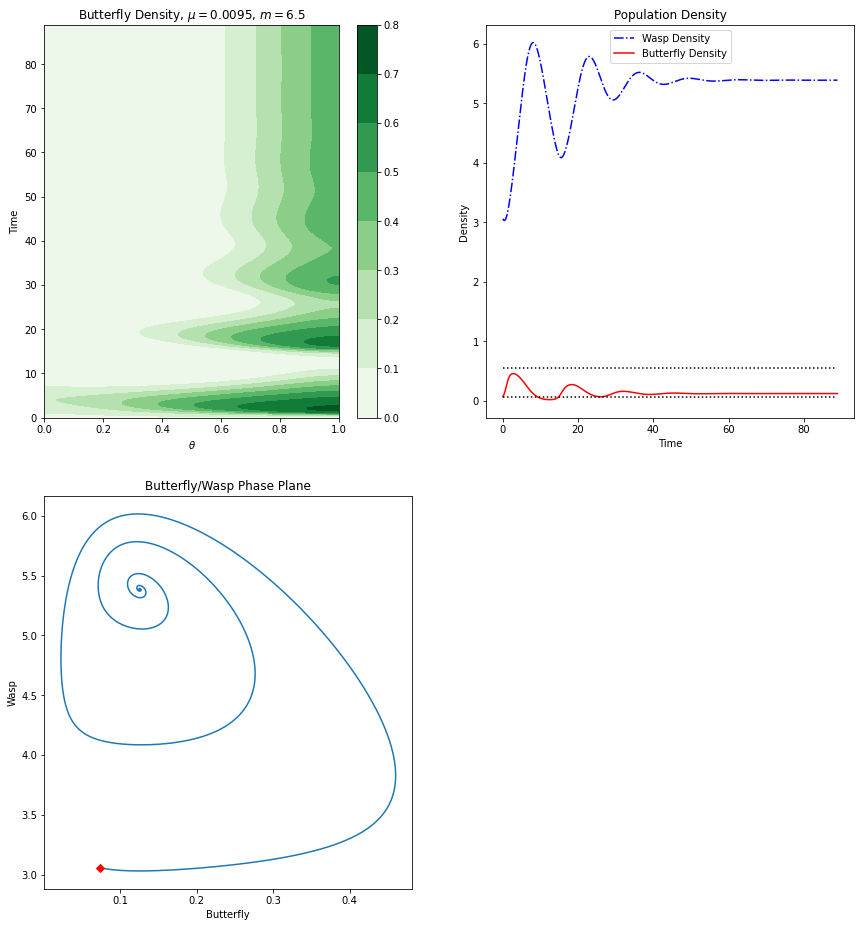

In [7]:
#%matplotlib inline
%autoreload 0

#[x,timeSteps,approx] = readApprox("../build-butterflyVWaspPDE-Desktop-Debug/approximation.csv")
#print("Final Time: {0:.3f}".format(timeSteps[-1]))

#filename = "../build-butterflyVWaspPDE-Desktop-Debug/approximation-m-1.0000-mu-0.5000.bin"
#filename = "../build-butterflyVWaspPDE-Desktop-Debug/approximation-m-15.0000-mu-0.5000.bin"
#filename = "../build-butterflyVWaspPDE-Desktop-Debug/approximation-m-5.0000-mu-0.5000.bin"

#filename = '../build-butterflyVWaspPDE-Desktop-Debug/approximation-c-1.1000-m-0.0100-mu-0.0100.bin'
filename = '../build-butterflyVWaspPDE-Desktop-Debug/approximation-c-1.1000-m-0.1100-mu-0.0100.bin'
filename = '../build-butterflyVWaspPDE-Desktop-Debug/approximation-c-1.1000-m-0.2100-mu-0.0100.bin'
filename = '../build-butterflyVWaspPDE-Desktop-Debug/approximation-c-1.1000-m-0.3100-mu-0.0100.bin'
filename = '../build-butterflyVWaspPDE-Desktop-Debug/approximation-c-1.1000-m-0.4100-mu-0.0100.bin'
filename = '../build-butterflyVWaspPDE-Desktop-Debug/approximation-c-1.1000-m-0.5100-mu-0.0100.bin'
filename = '../build-butterflyVWaspPDE-Desktop-Debug/approximation-c-1.1000-m-0.6100-mu-0.0100.bin'
filename = '../build-butterflyVWaspPDE-Desktop-Debug/approximation-c-1.1000-m-0.7100-mu-0.0100.bin'
filename = '../build-butterflyVWaspPDE-Desktop-Debug/approximation-c-1.1000-m-0.8100-mu-0.0100.bin'
filename = '../build-butterflyVWaspPDE-Desktop-Debug/approximation-c-1.1000-m-0.9100-mu-0.0100.bin'
filename = '../build-butterflyVWaspPDE-Desktop-Debug/approximation-c-1.1000-m-1.5000-mu-0.0100.bin'
#filename = '../build-butterflyVWaspPDE-Desktop-Debug/approximation-c-1.1000-m-9.5000-mu-0.0100.bin'

#filename = '../build-butterflyVWaspPDE-Desktop-Debug/approximation-TRIAL--c-2.7500-m-13.0000-mu-0.0095.bin'
#filename = '../build-butterflyVWaspPDE-Desktop-Debug/approximation-TRIAL--c-2.7500-m-9.7500-mu-0.0095.bin'
filename = '../build-butterflyVWaspPDE-Desktop-Debug/approximation-TRIAL--c-2.7500-m-6.5000-mu-0.0095.bin'

[x,timeSteps,totalPop,approx,wasps,mu,c,g,d,m] = readBinary(filename)
x = (x+1.0)*0.5
print("Final Time: {0:.3f}".format(timeSteps[-1]))
highButterfly = d*c/((1)*(g-d))
lowButterfly = d*c/((m+1.0)*(g-d))
print(lowButterfly,highButterfly)

fig = plt.figure()
fig.subplots_adjust(bottom=-0.0,top=3.0,right=2) #bottom=-3.0,top=1.0)

axes = fig.add_subplot(2,2,1)

[XGrid,TGrid] = numpy.meshgrid(x,timeSteps)
cp = axes.contourf(XGrid,TGrid,approx,cmap='Greens') #gist_yarg Greens BuGn
fig.colorbar(cp) # Add a colorbar to a plot
axes.set_title('Butterfly Density, $\mu=${0}, $m=${1}'.format(mu,m))
axes.set_xlabel(r'$\theta$')
axes.set_ylabel('Time')

axes1 = fig.add_subplot(2, 2, 2)
axes1.plot(timeSteps,wasps,'b-.',label="Wasp Density")
axes1.plot(timeSteps,totalPop,'r-',label="Butterfly Density")
axes1.plot(numpy.array([0.0,timeSteps[-1]]),
           numpy.array([lowButterfly,lowButterfly]),'k:')
axes1.plot(numpy.array([0.0,timeSteps[-1]]),
           numpy.array([highButterfly,highButterfly]),'k:')
axes1.set_title('Population Density')
axes1.set_xlabel('Time')
axes1.set_ylabel('Density')
axes1.legend(loc="upper center")

axes2 = fig.add_subplot(2, 2, 3)
axes2.plot(totalPop,wasps)
axes2.plot(totalPop[0],wasps[0],'rD')
axes2.set_title('Butterfly/Wasp Phase Plane')
axes2.set_xlabel('Butterfly')
axes2.set_ylabel('Wasp')


plt.show()
#fig.savefig("approximation-c-1.1-mu-01-m-150.pdf", bbox_inches='tight')


In [ ]:
approx[2]

In [ ]:
import csv

f = open("/tmp/crossSections.csv","w")
c = csv.writer(f)
c.writerow(x)
c.writerow(approx[200000])
c.writerow(approx[100000])
f.close()
